# Learn Handwritten Text Recognition

In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=ca486bd2d0479fad326f3cb54a4a5d7b302534b2e4aff9aea5efd8442c1be72e
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers, layers
from keras import backend as K

In [3]:
DIR = '../input/handwritten-characters/Train/'
train_data = []
img_size = 32
non_chars = ['#', '$', '&', '@']
for i in os.listdir(DIR):
    if i in non_chars:
        continue
    print('Characters', i)
    count = 0
    sub_directory = os.path.join(DIR, i)
    for j in os.listdir(sub_directory):
        count +=1 
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory, j), 0)
        img = cv2.resize(img, (img_size, img_size))
        train_data.append([img, i])

Characters N
Characters 7
Characters R
Characters 2
Characters B
Characters I
Characters F
Characters H
Characters 5
Characters E
Characters U
Characters M
Characters 8
Characters X
Characters 0
Characters K
Characters Q
Characters Y
Characters S
Characters G
Characters A
Characters T
Characters V
Characters Z
Characters 3
Characters 1
Characters C
Characters 4
Characters P
Characters 9
Characters L
Characters 6
Characters W
Characters D
Characters J


In [4]:
len(train_data)

140000

In [5]:
DIR = '../input/handwritten-characters/Validation/'
val_data = []
img_size = 32
for i in os.listdir(DIR):
    if i in non_chars:
        continue
    print('Characters', i)
    count = 0
    sub_directory = os.path.join(DIR, i)
    for j in os.listdir(sub_directory):
        count +=1 
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory, j), 0)
        img = cv2.resize(img, (img_size, img_size))
        val_data.append([img, i])

Characters N
Characters 7
Characters R
Characters 2
Characters B
Characters I
Characters F
Characters H
Characters 5
Characters E
Characters U
Characters M
Characters 8
Characters X
Characters 0
Characters K
Characters Q
Characters Y
Characters S
Characters G
Characters A
Characters T
Characters V
Characters Z
Characters 3
Characters 1
Characters C
Characters 4
Characters P
Characters 9
Characters L
Characters 6
Characters W
Characters D
Characters J


In [6]:
len(val_data)

18104

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_y = []
for features, label in train_data:
    train_X.append(features)
    train_y.append(label)

In [9]:
val_X = []
val_y = []
for features, label in val_data:
    val_X.append(features)
    val_y.append(label)

In [10]:
print('train x len', len(train_X))
print('train y len', len(train_y))
print('val x len', len(val_X))
print('val y len', len(val_y))

train x len 140000
train y len 140000
val x len 18104
val y len 18104


In [11]:
label_binarizer = LabelBinarizer()
train_y = label_binarizer.fit_transform(train_y)
val_y = label_binarizer.fit_transform(val_y)

In [12]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1, 32, 32, 1)
train_y = np.array(train_y)

In [13]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1, 32, 32, 1)
val_y = np.array(val_y)

In [14]:
print('Train X shape', train_X.shape)
print('Train y shape', train_y.shape)
print('Val X shape', val_X.shape)
print('val y shape', val_y.shape)

Train X shape (140000, 32, 32, 1)
Train y shape (140000, 35)
Val X shape (18104, 32, 32, 1)
val y shape (18104, 35)


In [15]:
model = Sequential()

model.add(layers.Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(35, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
!pip install h5py

In [19]:
from keras.callbacks import ModelCheckpoint

In [20]:
model_output_path = './weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(model_output_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [21]:
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(val_X, val_y), verbose=1, callbacks=callbacks_list)

Epoch 1/50
4375/4375 [==============================] - 16s 3ms/step - loss: 1.0315 - accuracy: 0.6887 - val_loss: 0.3835 - val_accuracy: 0.8798

Epoch 00001: val_accuracy improved from -inf to 0.87975, saving model to ./weights-improvement-01-0.88.hdf5
Epoch 2/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.4291 - accuracy: 0.8596 - val_loss: 0.3364 - val_accuracy: 0.8859

Epoch 00002: val_accuracy improved from 0.87975 to 0.88588, saving model to ./weights-improvement-02-0.89.hdf5
Epoch 3/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.3654 - accuracy: 0.8786 - val_loss: 0.3069 - val_accuracy: 0.8896

Epoch 00003: val_accuracy improved from 0.88588 to 0.88958, saving model to ./weights-improvement-03-0.89.hdf5
Epoch 4/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3344 - accuracy: 0.8861 - val_loss: 0.3121 - val_accuracy: 0.8862

Epoch 00004: val_accuracy did not improve from 0.88958
Epoch 5/50
4375/4375 [=========

4375/4375 [==============================] - 12s 3ms/step - loss: 0.1814 - accuracy: 0.9318 - val_loss: 0.2862 - val_accuracy: 0.9134

Epoch 00040: val_accuracy did not improve from 0.92383
Epoch 41/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1765 - accuracy: 0.9345 - val_loss: 0.3155 - val_accuracy: 0.9006

Epoch 00041: val_accuracy did not improve from 0.92383
Epoch 42/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1783 - accuracy: 0.9328 - val_loss: 0.2801 - val_accuracy: 0.9192

Epoch 00042: val_accuracy did not improve from 0.92383
Epoch 43/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1792 - accuracy: 0.9327 - val_loss: 0.2884 - val_accuracy: 0.9132

Epoch 00043: val_accuracy did not improve from 0.92383
Epoch 44/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1753 - accuracy: 0.9335 - val_loss: 0.2784 - val_accuracy: 0.9189

Epoch 00044: val_accuracy did not improve from 0.92383
Ep

In [22]:
model.save('model.hdf5')

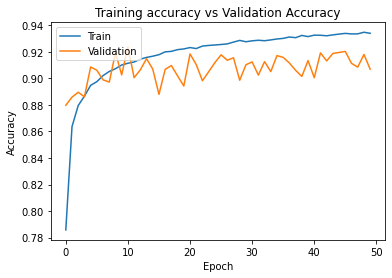

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

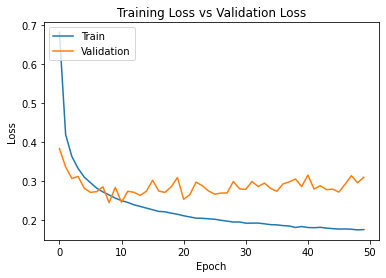

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing

In [25]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [29]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = label_binarizer.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [30]:
def get_word(letter):
    word = "".join(letter)
    return word

In [31]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

NameError: name 'imag' is not defined

In [ ]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [ ]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)